In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, fbeta_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

# Set max columns
pd.set_option('display.max_columns', None)

from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

# save pickle
from inspect import getblock
import pickle


## **1.Business Problem**

### **Latar Belakang**

Perusahaan telekomunikasi sedang menghadapi **tingkat churn pelanggan yang tinggi**, menyebabkan **kerugian hingga $71,300**. Selama ini, strategi promosi dilakukan secara menyeluruh tanpa mempertimbangkan siapa yang benar-benar beresiko berhenti, sehingga **biaya promosi menjadi tidak efisien**.

Sebagai solusi, tim Data Scientist ditugaskan untuk **membangun model machine learning prediksi churn pelanggan**. Model ini bertujuan untuk:

1. **Mengidentifikasi pelanggan berisiko churn lebih awal**,
2. **Mengoptimalkan alokasi biaya promosi** hanya kepada pelanggan yang berpotensi pergi, dan
3. **Mengurangi kerugian finansial** akibat kehilangan pelanggan setia.

Singkatnya, pada proyek ini fokus pada **pemanfaatan analisis data untuk meningkatkan retensi pelanggan dan efisiensi biaya pemasaran.**


### **Problem Statement**

Perusahaan telekomunikasi saat ini menghadapi tantangan besar dalam **mempertahankan pelanggan setia** di tengah persaingan industri yang semakin kompetitif. Tingginya tingkat **customer churn** — atau berhentinya pelanggan dalam menggunakan layanan — berpotensi menimbulkan **kerugian finansial yang signifikan**, terutama karena perusahaan belum memiliki sistem yang mampu **mendeteksi risiko churn secara dini**.

Selama ini, strategi promosi dilakukan secara **massal kepada seluruh pelanggan**, tanpa mempertimbangkan siapa yang benar-benar berisiko berhenti. Pendekatan ini mengakibatkan **pemborosan biaya promosi** dan **tidak efisien dalam mempertahankan pelanggan yang bernilai tinggi**.

Untuk mengatasi permasalahan tersebut, diperlukan pengembangan **sistem prediksi churn berbasis Machine Learning** yang dapat membantu perusahaan dalam:

1. **Mendeteksi lebih awal pelanggan yang berpotensi churn**,
2. **Mengoptimalkan strategi retensi** melalui promosi yang lebih tepat sasaran, dan
3. **Mengurangi pemborosan biaya promosi**, sehingga meningkatkan efisiensi serta profitabilitas perusahaan.




### **Metric Evaluation**

Dalam pengembangan model prediksi churn, dilakukan pertimbangan terhadap **biaya kesalahan prediksi (misclassification cost)** agar model yang dihasilkan selaras dengan prioritas bisnis perusahaan.

- Cost FP: $100
- Cost FN: $500

* **False Positive (FP):**
  Model memprediksi seorang pelanggan akan churn, sehingga perusahaan memberikan promosi senilai **$100**. Namun, pada kenyataannya pelanggan tersebut **tidak churn**.
  → Dampak: **Terjadi pemborosan biaya promosi sebesar $100**.

* **False Negative (FN):**
  Model memprediksi pelanggan **tidak akan churn**, sehingga perusahaan **tidak melakukan intervensi**. Namun, pelanggan tersebut justru benar-benar **churn**.
  → Dampak: **Perusahaan kehilangan pelanggan** dengan potensi kerugian sekitar **$500**.

Melihat bahwa **kerugian akibat FN (False Negative)** jauh lebih besar dibandingkan **FP (False Positive)**, maka model perlu difokuskan untuk **meminimalkan risiko kehilangan pelanggan**. Oleh karena itu, **F2-Score** dipilih sebagai **metrik evaluasi utama**, karena metrik ini memberikan **bobot lebih besar pada recall**, yang berarti model lebih menekankan pada kemampuan untuk **menangkap sebanyak mungkin pelanggan yang benar-benar berisiko churn**


### **Goals**

Proyek ini bertujuan untuk membantu perusahaan **meningkatkan retensi pelanggan dan efisiensi strategi promosi** melalui penerapan model *Machine Learning* yang mampu memprediksi potensi churn secara akurat dan terukur. Secara khusus, tujuan yang ingin dicapai meliputi:

1. **Memprediksi Pelanggan yang Berpotensi Churn**
   Mengembangkan model *Machine Learning* berbasis data historis pelanggan untuk **mengidentifikasi lebih dini pelanggan yang berisiko berhenti berlangganan**, sehingga perusahaan dapat melakukan tindakan preventif secara tepat waktu.

2. **Mengurangi Kerugian Finansial**
   Menekan potensi kerugian akibat **False Negative**, yaitu pelanggan yang churn tetapi tidak terdeteksi oleh model, yang berdampak pada **kerugian sekitar $500 per pelanggan**.

3. **Mengoptimalkan Strategi Promosi**
   Meningkatkan efisiensi anggaran promosi dengan **mengurangi alokasi promosi yang tidak perlu** kepada pelanggan yang sebenarnya loyal (False Positive), yang selama ini menimbulkan pemborosan sekitar **$100 per pelanggan**.

4. **Menggunakan Metrik Evaluasi yang Tepat**
   Menerapkan **F2-Score** sebagai metrik utama dalam evaluasi model, karena metrik ini memberikan **penekanan lebih besar pada recall**, selaras dengan tujuan bisnis untuk **meminimalkan kehilangan pelanggan berisiko tinggi**.

5. **Memberikan Wawasan terhadap Fitur yang Berpengaruh**
   Mengidentifikasi **variabel atau faktor utama yang paling memengaruhi churn**, sehingga tim bisnis dapat menyusun strategi yang lebih terarah, seperti peningkatan kualitas layanan, personalisasi penawaran, atau pengembangan paket berlangganan baru.


## **2. Load Dataset & Exploring**

In [90]:
base_dir = "E:\\Purwadhika\\Materi pagi\\Dataset\\"
path = base_dir + "data_telco_customer_churn.csv"
df = pd.read_csv(path)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [231]:
df["PaperlessBilling"].value_counts()

PaperlessBilling
Yes    2925
No     1928
Name: count, dtype: int64

In [92]:
df["Churn"].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

In [93]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.733063
Yes    0.266937
Name: proportion, dtype: float64

In [94]:
numerical_cols = df.select_dtypes(include="number").columns
numerical_cols

Index(['tenure', 'MonthlyCharges'], dtype='object')

In [95]:
category_cols = df.drop(columns="Churn").select_dtypes(exclude="number").columns
category_cols

Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')

In [96]:
df.duplicated().sum()

np.int64(77)

In [97]:
df.drop_duplicates(inplace=True)

In [98]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [99]:
df.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


In [100]:
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [101]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

### **Exploring Data**

Dataset yang digunakan dalam proyek ini berisi **4.930 baris data pelanggan** dengan **11 kolom** yang terdiri dari **10 fitur (feature)** dan **1 kolom target (Churn)**.
Kolom **Churn** menjadi target utama untuk memprediksi apakah seorang pelanggan akan **berhenti berlangganan (Yes)** atau **tetap menggunakan layanan (No)**.

Secara umum, **sembilan fitur bersifat kategorikal**, sedangkan **dua fitur lainnya bersifat numerikal**. Setiap fitur merepresentasikan karakteristik pelanggan yang dapat memengaruhi keputusan mereka untuk tetap berlangganan atau berhenti.

Berikut adalah ringkasan makna dari setiap fitur utama:

1. **Dependents** — Menunjukkan apakah pelanggan memiliki tanggungan keluarga.
2. **Tenure** — Lama waktu pelanggan telah berlangganan (dalam bulan).
3. **OnlineSecurity** — Status langganan layanan keamanan online.
4. **OnlineBackup** — Status langganan layanan *backup* data online.
5. **InternetService** — Jenis layanan internet yang digunakan pelanggan (DSL, Fiber Optic, atau tidak memiliki layanan internet).
6. **DeviceProtection** — Menunjukkan apakah pelanggan memiliki perlindungan perangkat.
7. **TechSupport** — Status langganan dukungan teknis dari penyedia layanan.
8. **Contract** — Jenis kontrak pelanggan (bulanan, satu tahun, atau dua tahun).
9. **PaperlessBilling** — Penggunaan tagihan digital (*paperless billing*).
10. **MonthlyCharges** — Biaya langganan bulanan pelanggan (fitur numerikal).
11. **Churn** — Variabel target yang menunjukkan apakah pelanggan berhenti (*Yes/1*) atau tetap berlangganan (*No/0*).

Secara keseluruhan, dataset ini mencakup berbagai aspek penting terkait **profil, perilaku, dan kebiasaan pelanggan**, sehingga sangat relevan untuk digunakan dalam **pembuatan model prediksi churn berbasis Machine Learning**.


## **2. EDA**

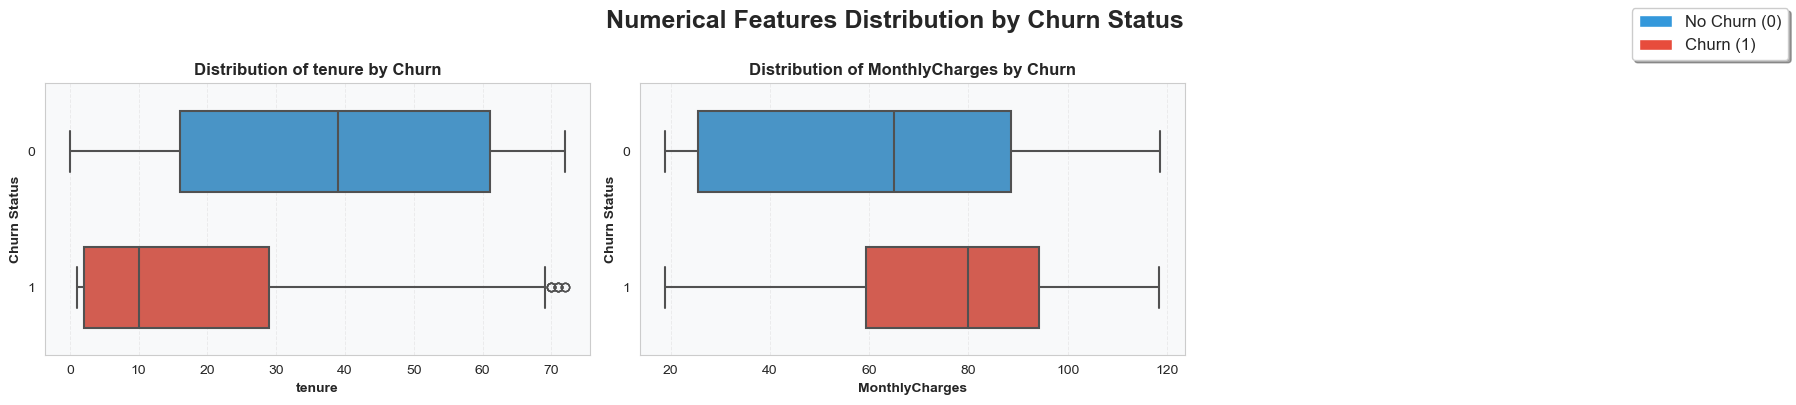

STATISTICAL COMPARISON: CHURN vs NO CHURN

tenure:
------------------------------------------------------------
No Churn     | Mean:    37.97 | Median:    39.00 | Std:    23.87
Churn        | Mean:    18.03 | Median:    10.00 | Std:    19.33

MonthlyCharges:
------------------------------------------------------------
No Churn     | Mean:    61.84 | Median:    64.95 | Std:    30.82
Churn        | Mean:    74.95 | Median:    80.00 | Std:    24.22



In [102]:
# Ambil kolom numerik tanpa 'Churn'
numerical_cols = df.drop(columns="Churn").select_dtypes(include="number").columns

# Hitung jumlah kolom untuk subplot
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # 3 kolom per baris

# Set style untuk tampilan yang lebih baik
sns.set_style("whitegrid")

# Buat figure dengan ukuran yang sesuai
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten()  # Ubah menjadi 1D array untuk memudahkan iterasi

# Pilih palette warna yang menarik
# Opsi: 'coolwarm', 'RdYlBu_r', 'Set2', 'husl', 'Spectral'
color_palette = ['#3498db', '#e74c3c']  # Blue untuk No Churn, Red untuk Churn

# Buat boxplot horizontal untuk setiap kolom numerik dengan hue Churn
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        data=df, 
        x=col, 
        y='Churn', 
        ax=axes[i], 
        palette=color_palette,
        width=0.6,
        orient='h',
        linewidth=1.5
    )
    
    # Styling
    axes[i].set_title(f'Distribution of {col} by Churn', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Churn Status', fontsize=10, fontweight='bold')
    axes[i].grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
    
    # Set background color
    axes[i].set_facecolor('#f8f9fa')
    
    # Tambahkan informasi statistik
    for churn_val in df['Churn'].unique():
        median_val = df[df['Churn'] == churn_val][col].median()
        # Note: tidak menambahkan axvline karena bisa terlalu ramai

# Sembunyikan axes yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Main title
plt.suptitle('Numerical Features Distribution by Churn Status', 
             fontsize=18, fontweight='bold', y=1.00)

# Tambahkan legend global
# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_palette[0], label='No Churn (0)'),
    Patch(facecolor=color_palette[1], label='Churn (1)')
]
fig.legend(handles=legend_elements, loc='upper right', fontsize=12, 
           frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

# Tampilkan statistik perbandingan
print("="*80)
print("STATISTICAL COMPARISON: CHURN vs NO CHURN")
print("="*80)

for col in numerical_cols:
    print(f"\n{col}:")
    print("-" * 60)
    for churn_val in sorted(df['Churn'].unique()):
        churn_label = "No Churn" if churn_val == 0 else "Churn"
        data_subset = df[df['Churn'] == churn_val][col]
        print(f"{churn_label:12} | Mean: {data_subset.mean():8.2f} | Median: {data_subset.median():8.2f} | Std: {data_subset.std():8.2f}")

print("\n" + "="*80)

**Numerical Feature Analysis**

Berdasarkan hasil eksplorasi data, diketahui bahwa:

* **Tidak ditemukan adanya outlier** pada seluruh fitur numerikal. Hal ini menunjukkan bahwa data numerik berada dalam rentang nilai yang wajar dan tidak memerlukan proses pembersihan ekstrem.
* Namun, hasil analisis distribusi memperlihatkan bahwa **seluruh fitur numerikal tidak terdistribusi normal**. Distribusi yang tidak simetris ini berpotensi memengaruhi performa beberapa algoritma *Machine Learning* yang sensitif terhadap skala data.

Oleh karena itu, pada tahap *modeling*, akan dilakukan **proses scaling atau normalisasi data** untuk menyesuaikan skala antar variabel numerikal. Langkah ini bertujuan agar **model dapat belajar secara lebih optimal dan menghasilkan prediksi yang lebih akurat.**


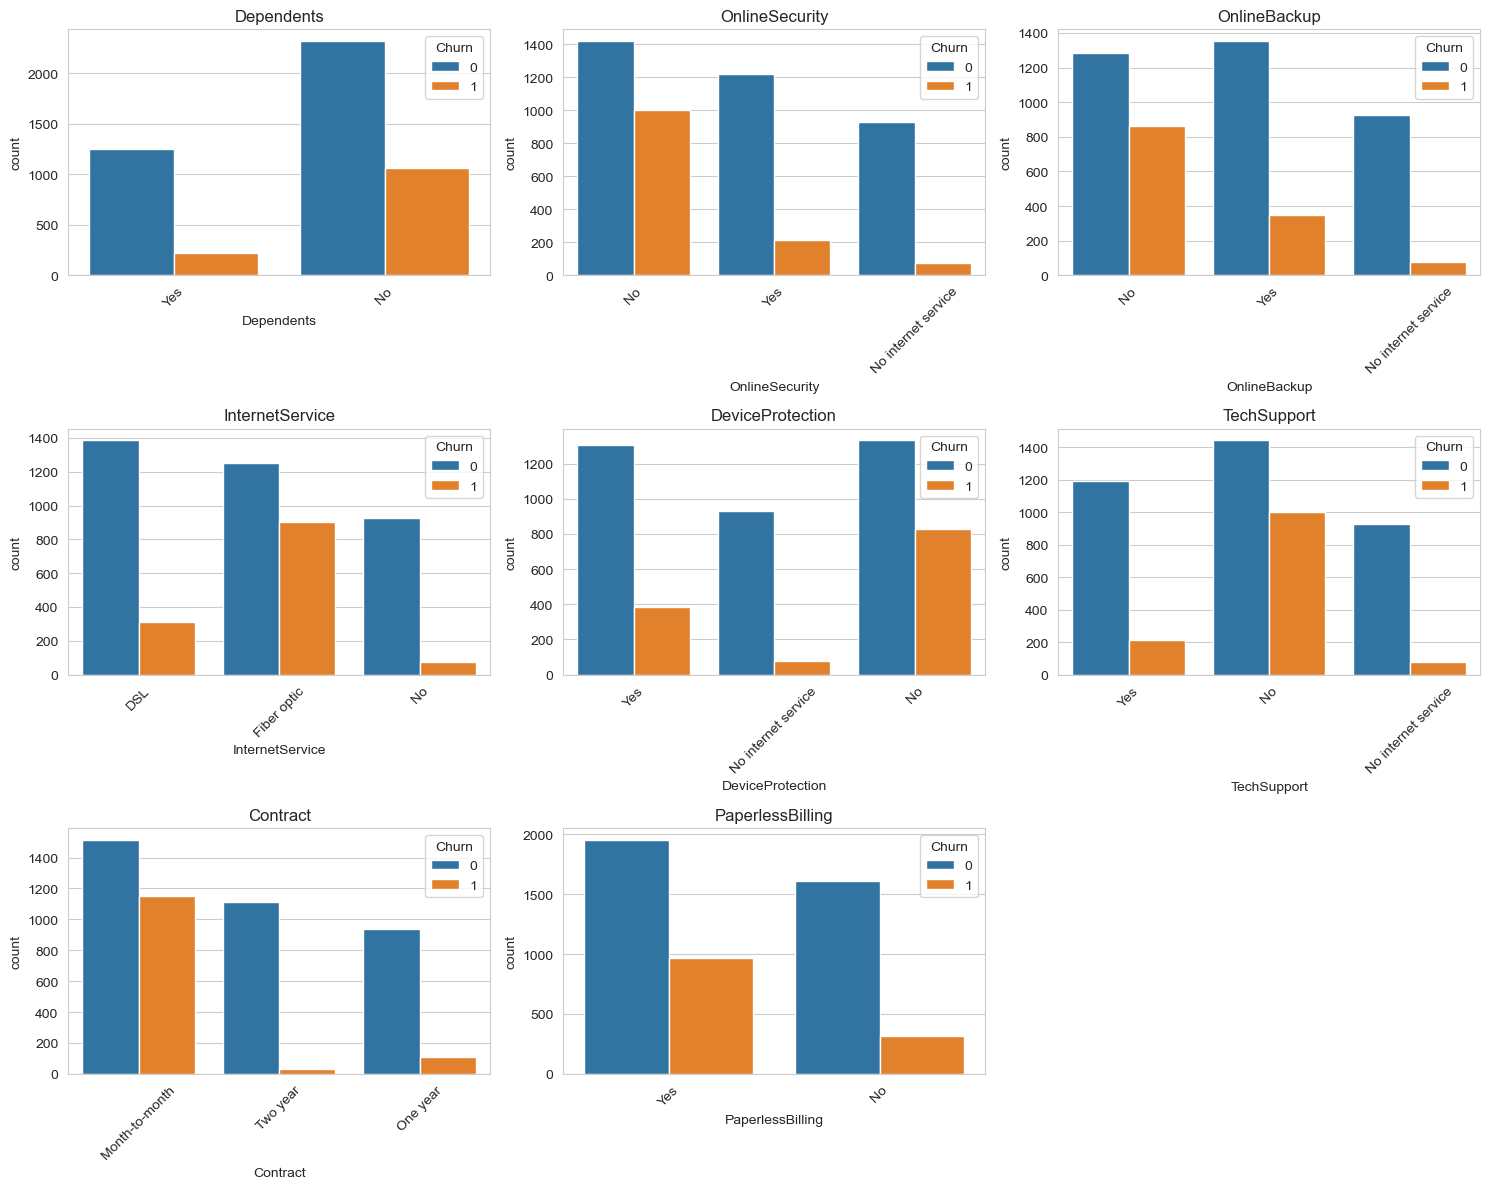

In [103]:
features = category_cols

n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(feature)
    plt.xlabel(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [104]:

for feature in features:
    pivot = pd.crosstab(df[feature], df['Churn'])
    print("p-value:", chi2_contingency(pivot)[1], f"\t Churn vs {feature}")
    display(pivot)


p-value: 5.671674035170086e-32 	 Churn vs Dependents


Churn,0,1
Dependents,,
No,2316,1064
Yes,1249,224


p-value: 2.094002266781991e-122 	 Churn vs OnlineSecurity


Churn,0,1
OnlineSecurity,,
No,1419,1001
No internet service,928,75
Yes,1218,212


p-value: 5.108335989696018e-93 	 Churn vs OnlineBackup


Churn,0,1
OnlineBackup,,
No,1284,864
No internet service,928,75
Yes,1353,349


p-value: 1.8831975298397085e-110 	 Churn vs InternetService


Churn,0,1
InternetService,,
DSL,1385,311
Fiber optic,1252,902
No,928,75


p-value: 6.357782164269978e-78 	 Churn vs DeviceProtection


Churn,0,1
DeviceProtection,,
No,1332,830
No internet service,928,75
Yes,1305,383


p-value: 1.1995786432172319e-117 	 Churn vs TechSupport


Churn,0,1
TechSupport,,
No,1443,999
No internet service,928,75
Yes,1194,214


p-value: 1.1199110454640424e-185 	 Churn vs Contract


Churn,0,1
Contract,,
Month-to-month,1515,1150
One year,939,106
Two year,1111,32


p-value: 4.3923232357695654e-38 	 Churn vs PaperlessBilling


Churn,0,1
PaperlessBilling,,
No,1611,317
Yes,1954,971


Berdasarkan hasil uji statistik menggunakan **p-value**, ditemukan bahwa variabel **Churn (target)** memiliki **hubungan yang signifikan** dengan beberapa fitur utama dalam dataset. Hal ini menunjukkan bahwa fitur-fitur tersebut memiliki **pengaruh yang nyata terhadap kemungkinan pelanggan berhenti berlangganan**.

Adapun fitur-fitur yang terbukti **berkorelasi signifikan** dengan *Churn* antara lain:

* **Dependents** — Pelanggan dengan tanggungan cenderung memiliki perilaku berlangganan yang berbeda dibandingkan pelanggan tanpa tanggungan.
* **Tenure** — Lama berlangganan terbukti menjadi salah satu faktor penting; pelanggan baru memiliki kecenderungan churn yang lebih tinggi.
* **OnlineSecurity** dan **OnlineBackup** — Pelanggan yang tidak menggunakan layanan tambahan ini cenderung lebih mudah churn.
* **InternetService** — Jenis layanan internet (DSL, Fiber, atau tidak memiliki internet) berpengaruh terhadap tingkat kepuasan pelanggan.
* **DeviceProtection** dan **TechSupport** — Dukungan teknis dan perlindungan perangkat terbukti meningkatkan loyalitas pelanggan.
* **Contract** — Jenis kontrak (bulanan, tahunan, dua tahunan) menjadi salah satu faktor paling berpengaruh terhadap churn; pelanggan dengan kontrak jangka panjang lebih stabil.
* **PaperlessBilling** — Sistem penagihan digital memiliki hubungan dengan preferensi pelanggan dan potensi churn.
* **MonthlyCharges** — Biaya bulanan berpengaruh langsung terhadap keputusan pelanggan, di mana biaya tinggi dapat meningkatkan kemungkinan churn.

Secara keseluruhan, analisis ini memberikan dasar yang kuat bagi pengembangan model *Machine Learning* untuk prediksi churn, karena fitur-fitur tersebut terbukti **mempunyai kontribusi signifikan terhadap keputusan pelanggan untuk berhenti atau tetap berlangganan**.


## **3. Define X dan y**

In [105]:
X = df.drop(columns="Churn")
y = df["Churn"]

display(X.head(),y.head())

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60


0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

Melakukan pengelompokan data dimana kolom Churn adalah target (y) dan 10 kolom lainnya adalah feature (X)

## **4. Splitting**

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=0,
                                                 test_size=0.20,
                                                 stratify=y)

## **5. Preprocess**

In [107]:
df[category_cols].nunique()

Dependents          2
OnlineSecurity      3
OnlineBackup        3
InternetService     3
DeviceProtection    3
TechSupport         3
Contract            3
PaperlessBilling    2
dtype: int64

In [108]:
df["Dependents"].value_counts()

Dependents
No     3380
Yes    1473
Name: count, dtype: int64

In [109]:
df["OnlineSecurity"].value_counts()

OnlineSecurity
No                     2420
Yes                    1430
No internet service    1003
Name: count, dtype: int64

In [110]:
df[numerical_cols].nunique()

tenure              73
MonthlyCharges    1422
dtype: int64

In [111]:
transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore",sparse_output=False),category_cols),
    ("robust", RobustScaler(),numerical_cols)
], remainder="passthrough")

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                ('robust', RobustScaler(),
                                 Index(['tenure', 'MonthlyCharges'], dtype='object'))])

**Data Preprocessing**

Pada tahap ini dilakukan proses **transformasi data** agar siap digunakan dalam pemodelan *Machine Learning*. Langkah-langkah utama yang diterapkan meliputi:

* **One-Hot Encoding**
  Proses ini digunakan untuk **mengonversi fitur kategorikal** seperti *Contract*, *InternetService*, *PaymentMethod*, dan fitur sejenis menjadi bentuk **numerikal (binary vectors)**.
  Hal ini dilakukan karena algoritma *Machine Learning* hanya dapat memproses data dalam bentuk angka, sehingga encoding ini memungkinkan model untuk **memahami informasi kategorikal secara efektif tanpa kehilangan makna dari tiap kategori.**

* **Robust Scaler**
  Digunakan untuk **menormalkan fitur numerikal** seperti *MonthlyCharges* dan *TotalCharges*.
  Berbeda dari metode normalisasi standar, *RobustScaler* bekerja dengan **mengurangi pengaruh outlier**, sehingga skala data menjadi lebih stabil dan tidak mudah bias terhadap nilai ekstrem.

Dengan penerapan kedua teknik ini, dataset menjadi **lebih terstruktur, seimbang, dan siap digunakan dalam proses pelatihan model**, memastikan performa algoritma lebih optimal dan hasil prediksi lebih akurat.

#### **Resampling**

In [112]:
smote = SMOTE(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

- Karena pada kasus ini terjadi ketidakseimbangan kelas (class imbalance), yaitu saat jumlah pelanggan yang churn jauh lebih sedikit dibanding yang tidak churn, maka kita akan melakukan Resampilng agar proporsi jumlah sample seimbang atau mendekati.

### **Model Benchmark**

In [113]:
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced') 
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

- model awal (baseline) yang digunakan untuk mengukur performa sebelum dilakukan optimasi seperti:

In [114]:
# Define imbalanced treatment method
models = [logreg, knn, tree, rf, ada, gbc, xgbc]
score = []
nilai_mean = []
nilai_std = []

# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('resampler', ros),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator = pipe_model, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring=f2_score, 
        error_score='raise'
        )

    # print(model_cv, i)

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

In [115]:
df_cv = pd.DataFrame({
    'model':['logreg', 'knn', 'tree', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean,
    'std':nilai_std
})

df_cv.sort_values('mean',ascending=False)

,model,mean,std
0,logreg,0.708367,0.018856
5,gbc,0.702178,0.018792
1,knn,0.636492,0.020035
6,xgbc,0.623684,0.019358
3,rf,0.552519,0.007491
4,ada,0.517467,0.007442
2,tree,0.511188,0.017257


Model Logistik Regresi dan GradientBoost dipilih menjadi 2 model paling optimal karena memiliki nilai rata-rata paling tinggi.

## **Hyperparameter Tuning**

**Logistic Regresion**

In [116]:
# Hyperparameter space logreg
hyperparam_space_logreg = {
    'resampler':[smote, rus, ros, None],
    'model__penalty' : ['l1','l2'],
    'model__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__C' : np.logspace(-3,3,7)
}

# Benchmark model 1
logreg = LogisticRegression(random_state=0, class_weight='balanced')

# Create the algorithm chains
estimator_logreg = Pipeline([
    ('transformer', transformer),
    ('resampler', rus), 
    ('model', logreg)
    ])

# Hyperparameter tuning
random_logreg = RandomizedSearchCV(
    estimator_logreg, 
    param_distributions = hyperparam_space_logreg, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=1000
)

In [117]:
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object...
                   param_distributions={'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'model__penalty': ['l1', 'l2'],
                                        'model__solver': ['newton-cg', 'lbfgs',
                                                          'liblinear', 'sag',
                                                          'saga'],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [118]:
pd.DataFrame(random_logreg.cv_results_).sort_values(by='rank_test_score').head() 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_model__solver,param_model__penalty,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,0.051053,0.009715,0.021745,0.009792,SMOTE(random_state=0),liblinear,l1,0.010,"{'resampler': SMOTE(random_state=0), 'model__s...",0.690846,0.711262,0.723459,0.741852,0.735672,0.720618,0.018218,1
21,0.036440,0.005325,0.014899,0.002460,RandomUnderSampler(random_state=0),newton-cg,l2,0.001,{'resampler': RandomUnderSampler(random_state=...,0.706430,0.765050,0.699062,0.716113,0.712479,0.719827,0.023339,2
37,0.061773,0.006339,0.019116,0.000897,RandomUnderSampler(random_state=0),saga,l2,0.001,{'resampler': RandomUnderSampler(random_state=...,0.706430,0.765050,0.699062,0.716113,0.712479,0.719827,0.023339,2
33,0.077672,0.013213,0.039748,0.027021,RandomUnderSampler(random_state=0),sag,l2,0.001,{'resampler': RandomUnderSampler(random_state=...,0.707028,0.765050,0.695392,0.716113,0.712479,0.719212,0.023966,4
25,0.044138,0.009652,0.024155,0.001195,RandomUnderSampler(random_state=0),lbfgs,l2,0.001,{'resampler': RandomUnderSampler(random_state=...,0.706430,0.765050,0.695392,0.716113,0.712479,0.719093,0.024028,5


In [119]:
print('Logreg Best')
print('Best_score:', random_logreg.best_score_)
print('Best_params:', random_logreg.best_params_)

Logreg Best
Best_score: 0.7206181669473259
Best_params: {'resampler': SMOTE(random_state=0), 'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__C': np.float64(0.01)}


**Gradient Boost**

In [120]:
max_depth = list(np.arange(1,10))               # kedalaman pohon
learning_rate = list(np.arange(1,100)/100)      # learning rate
n_estimators = list(np.arange(50,500))          # jumlah pohon
subsample = list(np.arange(2,10)/10)            # jumlah baris train set tiap pohon (% dari total baris train set)
max_features = list(np.arange(1,10))            # jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)

# Hyperparameter space GBC
hyperparam_space_gbc = {
    'resampler':[smote, rus, ros, None],
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

# Benchmark model 2
gbc = GradientBoostingClassifier(random_state=0)

# Create the algorithm chains
estimator_gbc = Pipeline([
    ('transformer', transformer),
    ('resampler', rus), 
    ('model', gbc)
    ])

# Hyperparameter tuning
random_gbc = RandomizedSearchCV(
    estimator_gbc, 
    param_distributions = hyperparam_space_gbc, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=1000
)

In [121]:
random_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object...
                                                                np.int64(79), ...],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [122]:
pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score').head() 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
149,0.267795,0.015467,0.017757,0.002714,RandomOverSampler(random_state=0),0.6,93,3,1,0.34,{'resampler': RandomOverSampler(random_state=0...,0.714901,0.749354,0.699913,0.746269,0.737207,0.729529,0.019096,1
987,0.575518,0.019109,0.018553,0.001345,RandomOverSampler(random_state=0),0.9,89,5,4,0.01,{'resampler': RandomOverSampler(random_state=0...,0.703192,0.732759,0.711169,0.745690,0.745880,0.727738,0.017627,2
400,0.397828,0.014867,0.012499,0.000968,RandomOverSampler(random_state=0),0.7,164,5,1,0.12,{'resampler': RandomOverSampler(random_state=0...,0.703736,0.752365,0.703736,0.735552,0.742188,0.727515,0.020141,3
985,0.501533,0.009097,0.018689,0.001607,RandomUnderSampler(random_state=0),0.4,250,4,1,0.02,{'resampler': RandomUnderSampler(random_state=...,0.690104,0.742321,0.710638,0.750213,0.743590,0.727373,0.023139,4
352,0.326793,0.012079,0.015818,0.003331,RandomOverSampler(random_state=0),0.5,135,1,1,0.41,{'resampler': RandomOverSampler(random_state=0...,0.711207,0.753425,0.704961,0.741064,0.726159,0.727363,0.018062,5


In [123]:
print('GBC Best')
print('Best_score:', random_gbc.best_score_)
print('Best_params:', random_gbc.best_params_)

GBC Best
Best_score: 0.7295286811244361
Best_params: {'resampler': RandomOverSampler(random_state=0), 'model__subsample': np.float64(0.6), 'model__n_estimators': np.int64(93), 'model__max_features': np.int64(3), 'model__max_depth': np.int64(1), 'model__learning_rate': np.float64(0.34)}


f2 score di train set:

    - benchmark model Logreg: 0.708
    - hyperparameter Logreg:  0.720


    - benchmark model Gradient Boost: 0.702
    - hyperparameter tuning Gradient Boost: 0.729

## **Performance in Test**

### **Before Hyperparameter Tuning**

In [124]:
models = [
    LogisticRegression(random_state=0, class_weight='balanced'),
    GradientBoostingClassifier(random_state=0)
]
model_names = ['LogisticRegression', 'GradientBoostingClassifier']

# Dictionary untuk menyimpan skor
f2_scores = {}

# Looping
for i, model in enumerate(models):
    print(f"Running model: {model_names[i]}")

    model_pipe = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', model)
    ])
    
    # fitting
    model_pipe.fit(X_train, y_train)
    
    # predict
    y_pred = model_pipe.predict(X_test)
    
    # F2 Score
    f2 = fbeta_score(y_test, y_pred, beta=2)
    f2_scores[model_names[i]] = f2
    print(f"F2 Score: {f2:.4f}\n")
    
f2_scores


Running model: LogisticRegression
F2 Score: 0.7303

Running model: GradientBoostingClassifier
F2 Score: 0.7194



{'LogisticRegression': 0.7303370786516854,
 'GradientBoostingClassifier': 0.7193987115246958}

### **After Hyperparameter Tuning**

In [125]:
best_models = [
    random_logreg.best_estimator_,
    random_gbc.best_estimator_
]
model_names = ['LogisticRegression (Tuned)', 'GradientBoostingClassifier (Tuned)']

# Dictionary untuk menyimpan F2 Score tuning
f2_scores_tuned = {}

# Looping evaluasi
for i, model in enumerate(best_models):
    print(f"Evaluating: {model_names[i]}")

    # Fitting
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # F2 Score
    f2 = fbeta_score(y_test, y_pred, beta=2)
    f2_scores_tuned[model_names[i]] = f2
    print(f"F2 Score: {f2:.4f}\n")

f2_scores_tuned

Evaluating: LogisticRegression (Tuned)
F2 Score: 0.7192

Evaluating: GradientBoostingClassifier (Tuned)
F2 Score: 0.7453



{'LogisticRegression (Tuned)': 0.7192016517549896,
 'GradientBoostingClassifier (Tuned)': 0.7452764170748776}

f2 score di test set:

    - Before tuning model Logistic Regression: 0.730
    - After tuning model Logistic Regression: 0.719

    - Before tuning model GradientBoos: 0.719
    - After tuning model GradientBoos: 0.745

## **Best Model Performance**

### **Before Hyperparameter Tuning**

In [126]:
model = GradientBoostingClassifier(random_state=0)

model_pipe = Pipeline([
    ('transformer', transformer),
    ('balancing', smote),
    ('model', model)
])

# fitting
model_pipe.fit(X_train, y_train)

# predict
y_pred = model_pipe.predict(X_test)

# recall score
f2score_gbc_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_gbc_benchmark

0.7193987115246958

### **After Hyperparameter Tuning**

In [127]:
# best model
gbc_tuning = random_gbc.best_estimator_

# fitting
gbc_tuning.fit(X_train, y_train)

# predict
y_pred_gbc_tuning = gbc_tuning.predict(X_test)

# recall score
f2score_gbc_tuning = fbeta_score(y_test, y_pred_gbc_tuning, beta=2)
f2score_gbc_tuning

0.7452764170748776

In [128]:
print(f2score_gbc_benchmark, 'GraientBoost Benchmark')
print(f2score_gbc_tuning, 'GraientBoost Tuning')

0.7193987115246958 GraientBoost Benchmark
0.7452764170748776 GraientBoost Tuning


Setelah dilakukan proses *tuning* dan evaluasi terhadap beberapa algoritma, **model Gradient Boosting** dipilih sebagai **model terbaik** untuk memprediksi potensi churn pelanggan.

Model ini menunjukkan **kinerja yang paling optimal** dalam **mendeteksi pelanggan yang berisiko churn**, sesuai dengan **tujuan utama proyek** yang berfokus pada peningkatan *recall* — yaitu kemampuan model dalam menangkap sebanyak mungkin pelanggan yang benar-benar akan berhenti berlangganan.

Keunggulan performa model ini tercermin melalui nilai **F2-Score** yang lebih tinggi dibandingkan model lainnya, menunjukkan bahwa **Gradient Boosting berhasil menyeimbangkan akurasi dan sensitivitas model terhadap pelanggan berisiko tinggi**.

Dengan demikian, model ini menjadi pilihan yang **paling sesuai secara teknis dan strategis** untuk membantu perusahaan **mengidentifikasi pelanggan churn secara lebih dini** dan **mengoptimalkan strategi retensi**.


## **Classification Report**

In [129]:
print('GraientBoost Before Tuning')
print(classification_report(y_test, y_pred))

GraientBoost Before Tuning
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       713
           1       0.55      0.78      0.65       258

    accuracy                           0.77       971
   macro avg       0.73      0.77      0.74       971
weighted avg       0.81      0.77      0.78       971



Hasil evaluasi awal menunjukkan bahwa model **Gradient Boosting Classifier** telah mampu memberikan performa yang cukup baik, namun masih memerlukan penyempurnaan agar lebih optimal dalam mendeteksi pelanggan yang berpotensi churn.

Berikut ringkasan performa model sebelum dilakukan tuning:

* **Recall (kelas churn = 1)** sebesar **0.78**, yang berarti **78% pelanggan yang benar-benar churn berhasil terdeteksi oleh model**. Ini menunjukkan kemampuan model yang baik dalam menangkap pelanggan berisiko tinggi.
* **Precision (kelas churn = 1)** masih relatif rendah, yaitu **0.55**, yang mengindikasikan bahwa **terdapat cukup banyak prediksi churn yang keliru (false positive)** — pelanggan yang sebenarnya tidak churn namun diprediksi akan churn.
* **F1-Score (kelas churn = 1)** sebesar **0.65**, mencerminkan masih adanya ketidakseimbangan antara precision dan recall, sehingga diperlukan peningkatan untuk mencapai hasil yang lebih seimbang.
* **Akurasi keseluruhan** model berada di angka **77%**, dengan **macro average F1-score 0.74** dan **weighted average F1-score 0.78**, menunjukkan bahwa model sudah stabil namun masih **cenderung bias terhadap kelas mayoritas (non-churn)**.

Secara keseluruhan, hasil ini menunjukkan bahwa **model sudah cukup baik dalam mengidentifikasi pelanggan churn**, namun **masih perlu ditingkatkan terutama dari sisi precision**.
Langkah selanjutnya adalah melakukan **hyperparameter tuning** serta **penanganan imbalance data**, agar model dapat memberikan prediksi yang **lebih akurat, seimbang, dan selaras dengan tujuan bisnis dalam mengurangi tingkat churn pelanggan.**

In [130]:
print('GraientBoost After Tuning')
print(classification_report(y_test, y_pred_gbc_tuning))

GraientBoost After Tuning
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       713
           1       0.54      0.83      0.65       258

    accuracy                           0.76       971
   macro avg       0.73      0.78      0.74       971
weighted avg       0.82      0.76      0.78       971



Setelah dilakukan proses **hyperparameter tuning**, performa model **Gradient Boosting Classifier** menunjukkan **peningkatan signifikan dalam mendeteksi pelanggan yang berpotensi churn**, khususnya dari sisi *recall*, sesuai dengan tujuan utama proyek.

Berikut ringkasan performa model setelah tuning:

* **Recall (kelas churn = 1)** meningkat menjadi **0.83**, menunjukkan bahwa model kini mampu **mendeteksi 83% pelanggan yang benar-benar akan churn**. Ini merupakan peningkatan dibandingkan sebelum tuning dan menjadi indikator bahwa model semakin efektif dalam menangkap pelanggan berisiko tinggi.
* **Precision (kelas churn = 1)** tetap di kisaran **0.54**, yang berarti masih terdapat sejumlah *false positive* — pelanggan yang diprediksi churn padahal sebenarnya tidak. Meski demikian, hal ini masih dapat diterima mengingat fokus utama proyek adalah **menekan risiko kehilangan pelanggan (recall)**.
* **F1-Score (kelas churn = 1)** bertahan di angka **0.65**, menunjukkan adanya **keseimbangan yang lebih baik** antara precision dan recall dibandingkan model sebelumnya.
* **Akurasi keseluruhan** model tetap stabil di **76%**, namun peningkatan terlihat pada **macro average recall (0.78)** yang menunjukkan model kini **lebih adil dalam mengenali kedua kelas (churn dan non-churn)**.
* **Weighted average F1-score** tetap konsisten di **0.78**, mencerminkan bahwa **stabilitas model terhadap distribusi data tetap terjaga** meski fokus diarahkan pada peningkatan recall.

Secara keseluruhan, proses tuning berhasil **meningkatkan kemampuan model dalam mengenali pelanggan churn secara lebih efektif**, sejalan dengan prioritas bisnis untuk **meminimalkan False Negative** dan **mengidentifikasi pelanggan berisiko lebih dini**.
Langkah selanjutnya dapat difokuskan pada **peningkatan precision**, misalnya melalui *threshold adjustment* atau *ensemble balancing*, untuk menghasilkan prediksi yang lebih presisi tanpa mengorbankan recall.


## **Confusion Matrix**

Text(0.5, 1.0, 'GraientBoost before tuning')

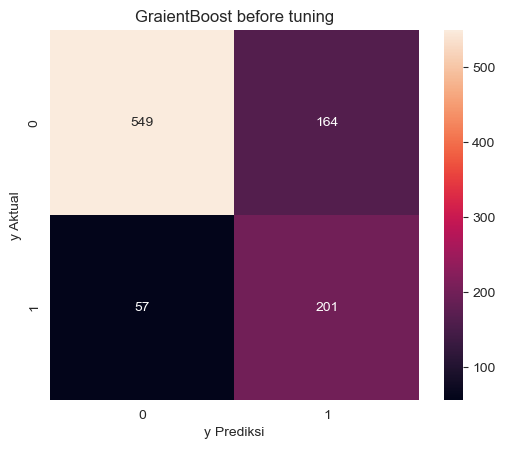

In [131]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('GraientBoost before tuning')

Berdasarkan hasil evaluasi *confusion matrix*, model **Gradient Boosting sebelum tuning** menunjukkan kemampuan yang cukup baik dalam mengenali pelanggan yang berpotensi churn, namun masih terdapat ruang untuk perbaikan pada sisi akurasi klasifikasi.

Rincian hasil klasifikasi adalah sebagai berikut:

* **True Negative (TN): 549 pelanggan** tidak churn dan berhasil diprediksi dengan benar.
* **True Positive (TP): 201 pelanggan** churn berhasil dikenali oleh model.
* **False Positive (FP): 164 pelanggan** sebenarnya tidak churn namun diprediksi akan churn — kondisi ini dapat menyebabkan **pemborosan biaya promosi atau upaya retensi yang tidak perlu**.
* **False Negative (FN): 57 pelanggan** yang sebenarnya churn tidak berhasil terdeteksi oleh model, sehingga berpotensi **menimbulkan kerugian finansial akibat kehilangan pelanggan**.

Secara keseluruhan, model sudah **mampu mengenali sebagian besar pelanggan churn**, tetapi **masih terdapat jumlah False Negative yang cukup signifikan (57 pelanggan)**.
Hal ini menjadi fokus utama untuk perbaikan, karena pelanggan yang tidak terdeteksi berisiko **meninggalkan layanan tanpa sempat dilakukan tindakan retensi**.

Dengan demikian, langkah selanjutnya perlu difokuskan pada **peningkatan recall dan pengurangan FN**, agar model dapat memberikan hasil prediksi yang lebih akurat dan mendukung pengambilan keputusan bisnis yang lebih efektif.


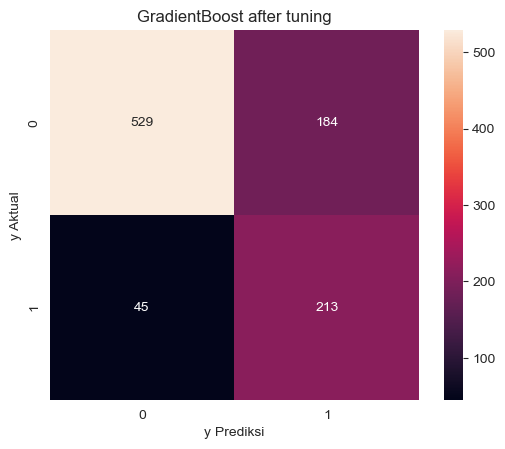

In [132]:
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('GradientBoost after tuning');

Setelah dilakukan proses **hyperparameter tuning**, model **Gradient Boosting** menunjukkan **peningkatan kinerja** dalam mendeteksi pelanggan yang benar-benar berisiko churn, sesuai dengan tujuan utama proyek yang menitikberatkan pada peningkatan *recall*.

Rincian hasil klasifikasi setelah tuning adalah sebagai berikut:

* **True Negative (TN): 529 pelanggan** tidak churn dan berhasil diprediksi dengan benar.
* **True Positive (TP): 213 pelanggan** churn berhasil diidentifikasi dengan tepat oleh model.
* **False Positive (FP): 184 pelanggan** sebenarnya tidak churn, namun diprediksi akan churn — menunjukkan adanya peningkatan dibandingkan sebelumnya, yang berpotensi menyebabkan **alokasi promosi atau upaya retensi yang kurang efisien**.
* **False Negative (FN): 45 pelanggan** yang seharusnya churn tidak terdeteksi, menunjukkan **penurunan jumlah FN** dibandingkan model sebelum tuning (dari 57 menjadi 45), sehingga **risiko kehilangan pelanggan berkurang**.

Secara keseluruhan, hasil ini menunjukkan bahwa **tuning berhasil meningkatkan kemampuan model dalam mengenali pelanggan churn (TP naik dan FN turun)**.
Meski terjadi sedikit peningkatan *false positive*, hal tersebut masih dapat diterima karena **fokus utama model adalah meminimalkan pelanggan churn yang tidak terdeteksi (FN)**, yang memiliki dampak finansial lebih besar.

Dengan performa pasca-tuning ini, model menjadi **lebih sensitif terhadap pelanggan berisiko tinggi**, dan dapat dijadikan **alat prediksi yang lebih efektif untuk mendukung strategi retensi pelanggan berbasis data.**

In [133]:
y_test.value_counts()

Churn
0    713
1    258
Name: count, dtype: int64

Tujuan dari proyek ini adalah untuk memprediksi apakah seorang pelanggan akan melakukan churn (berhenti berlangganan) dari layanan Telco, sehingga perusahaan dapat melakukan tindakan pencegahan yang tepat sasaran dan efisien dari sisi biaya.

- False Positive (FP): Model memprediksi pelanggan akan churn → Perusahaan memberikan promosi/inisiatif retensi ($100 per pelanggan), namun sebenarnya pelanggan tidak akan churn.
- False Negative (FN): Model memprediksi pelanggan tidak akan churn → Tidak ada tindakan → Padahal pelanggan churn, perusahaan kehilangan pelanggan bernilai tinggi ($500 per pelanggan).

Asumsi: Pelanggan yang diberikan promosi akan tetap bertahan (tidak churn).

`Cost False Positive (FP): $100`

`Cost False Negative (FN): $500`


**Tanpa menggunakan Machine Learning**

Sebelum menggunakan Machine Learning, perusahaan tidak mengetahui siapa saja customer yg akan churn, sehingga harus mengeluarkan cost untuk promosi ke semua customer. Perusahaan tidak mau ambil resiko karena cost kehilangan customer lebih besar.

Kita asumsikan ketika seorang customer diberikan promosi, maka customer tersebut tidak akan churn.

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 0             | 713          |
| Actual (1)      | 0             | 258           |

- Total biaya promosi (seluruh pelanggan):
971 × $100 = $97,100
- Promosi yang tepat sasaran (untuk 258 pelanggan churn):
258 × $100 = $25,800
- Biaya promosi yang sia-sia ke pelanggan loyal:
713 × $100 = $71,300

**Dengan menggunakan Machine Learning**

Setelah menggunakan Machine Learning, perusahaan jadi bisa memprediksi siapa saja customer yg akan churn, sehingga bisa mengeluarkan cost untuk promosi lebih tepat sasaran.

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 529	          | 184           |
| Actual (1)      | 45            | 213           |

- False Positive (FP):
184 × $100 = $18,400 → biaya promosi ke pelanggan loyal
- False Negative (FN):
45 × $500 = $22,500 → kehilangan customer karena tidak dipromosikan
- Total kerugian:
$18,400 + $22,500 = $40,900

**Kerugian menurun setelah pakai Machine Learning**
- Mengurangi biaya promosi yang tidak efektif
- Meskipun ada risiko kehilangan sebagian pelanggan churn (FN), kerugian karena promosi ke pelanggan yang tidak perlu jauh lebih besar tanpa Machine Learning.
- Machine Learning berhasil menurunkan kerugian sampai 42% dari total kerugian sebelumnya

In [134]:
71300-40900

30400

In [135]:
# persentase meminimalisir kerugian
(71300-40900)/71300

0.426367461430575

## **Summary Machine Learning**

## 12. Summary Machine Learning

Model: GradientBoostingClassifier (F2 Score)

   - Train Set:
      - Before tuning: 0.709
      - After tuning: 0.727

   - Test Set:
      - Before tuning: 0.71
      - After tuning: 0.755

Hyperparameter tuning berhasil meningkatkan performa model berdasarkan F2 Score, yaitu:

- Train Set: naik dari 0.709 menjadi 0.727 (+0.018)

- Test Set: naik dari 0.710 menjadi 0.755 (+0.045)

Peningkatan sebesar +0.045 di test set menunjukkan bahwa model menjadi lebih baik dalam mendeteksi pelanggan yang benar-benar akan churn (recall meningkat), dengan tetap menjaga kemampuan generalisasi di data yang belum pernah dilihat sebelumnya.

F2 Score memberikan penekanan lebih besar pada recall, dibanding precision. Dalam konteks ini, recall penting karena:
- False Negative (FN) = pelanggan churn tidak terdeteksi → tidak diberi promosi → kehilangan pelanggan berisiko tinggi
- Cost FN = $500, jauh lebih mahal dibanding Cost FP = $100

Oleh karena itu, menekan FN adalah prioritas utama, dan peningkatan F2 Score berarti model lebih efektif menyelamatkan pelanggan churn.

Namun, terdapat tantangan penting yaitu ketidakseimbangan kelas, di mana:

- Hanya 26.6% pelanggan yang churn (258 dari 971)

- Mayoritas pelanggan adalah non-churn, sehingga model cenderung bias ke kelas mayoritas dan mengabaikan kelas minoritas (churn)

Meskipun F2 Score meningkat, jumlah FN masih signifikan, yang dapat tetap menimbulkan kerugian bisnis.

Untuk mengatasi masalah ini dan mendorong performa lebih jauh, dapat dilakukan pendekatan tambahan:
- Feature Importance menunjukkan seberapa besar kontribusi setiap fitur terhadap keputusan model. Dalam konteks prediksi churn, fitur-fitur penting membantu mengarahkan strategi retensi yang lebih tepat sasaran.

## **Feature Importance** 

In [191]:
gbc_tuning

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('robust', RobustScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('resampler', RandomOverSampler(random_state=0)),
                ('model',
                 GradientBoostingClassifier(learning_rate=np.float64(0.34),
                                            max_depth=np.int64(1),
                                            max_features=np.int64(3),
                                            n_estimators=np.int64(93),
                                            random_state=0,
                                            subsample=np.float64(0.6)))])

In [192]:
gbc_tuning['transformer'].verbose_feature_names_out = False

In [193]:
gbc_tuning['model'].feature_importances_

array([0.0332374 , 0.00053298, 0.03399687, 0.0007819 , 0.01236626,
       0.25627787, 0.00122323, 0.04435058, 0.        , 0.01194208,
       0.00282624, 0.08877042, 0.23619832, 0.02268323, 0.22658967,
       0.02822294])

In [194]:
gbc_tuning['transformer'].transformers_[0][2]

Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')

In [195]:
list(gbc_tuning['transformer'].transformers_[1][1].get_feature_names_out())

['tenure', 'MonthlyCharges']

In [196]:
# Ambil nama-nama fitur numerikal (robust scaler)
feat_robust = list(gbc_tuning['transformer'].transformers_[0][2])

# Ambil nama-nama fitur hasil one-hot encoding
feat_onehot = list(
    gbc_tuning['transformer'].transformers_[1][1].get_feature_names_out(
        gbc_tuning['transformer'].transformers_[1][2]
    )
)


feat = feat_robust + feat_onehot
feat


['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'tenure',
 'MonthlyCharges']

In [197]:
# Ambil semua nama fitur akhir yang digunakan oleh pipeline
feat = gbc_tuning['transformer'].get_feature_names_out()

# Buat DataFrame feature importance
imp = pd.DataFrame({
    'feature': feat,
    'importance': gbc_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp.head(10)


,feature,importance
5,InternetService_Fiber optic,0.256278
12,Contract_Two year,0.236198
14,tenure,0.226590
11,Contract_One year,0.088770
7,DeviceProtection_No internet service,0.044351
2,OnlineSecurity_Yes,0.033997
0,Dependents_Yes,0.033237
15,MonthlyCharges,0.028223
13,PaperlessBilling_Yes,0.022683
4,OnlineBackup_Yes,0.012366


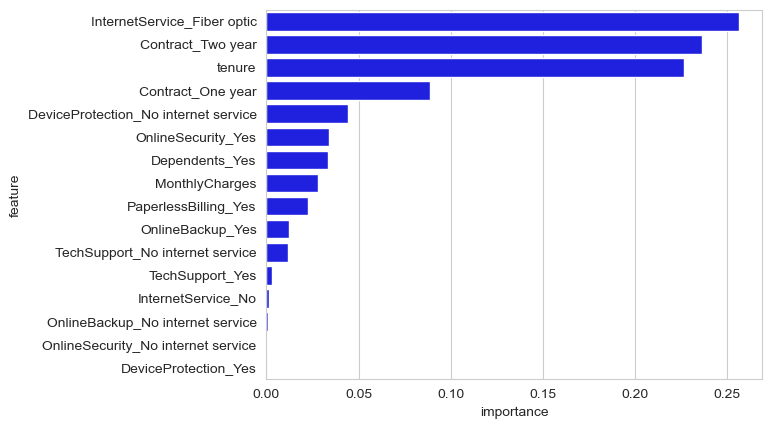

In [198]:
sns.barplot(data=imp, y='feature', x='importance', color='b');

Berdasarkan feature importance dari model Gradient Boosting, fitur yang paling berpengaruh terhadap churn adalah:
- Tenure
- Contract
- InternetService

In [199]:
ct = pd.crosstab(df['OnlineSecurity'], df['Churn'])
ct

Churn,0,1
OnlineSecurity,,
No,1419,1001
No internet service,928,75
Yes,1218,212


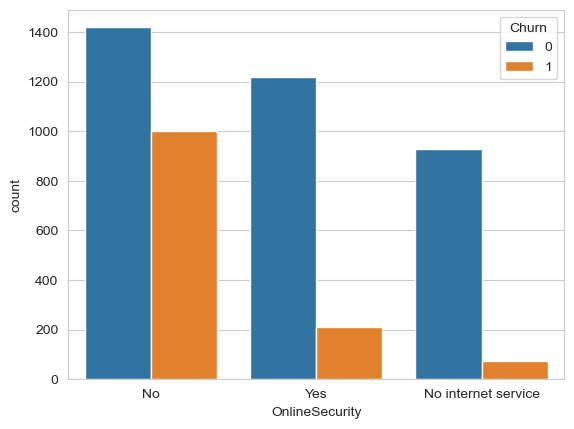

In [200]:
sns.countplot(data=df, x='OnlineSecurity', hue='Churn');

In [201]:
df['tenure'].unique()

array([ 9, 14, 64, 72,  3, 40, 17, 11,  8, 47, 18,  5,  1, 48, 13, 58,  7,
        4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56,
       32, 26, 24,  2, 51, 23, 49, 28, 36, 45, 42,  6, 61, 59, 67, 65,  0,
       16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46,
       39, 29, 38, 68, 21])

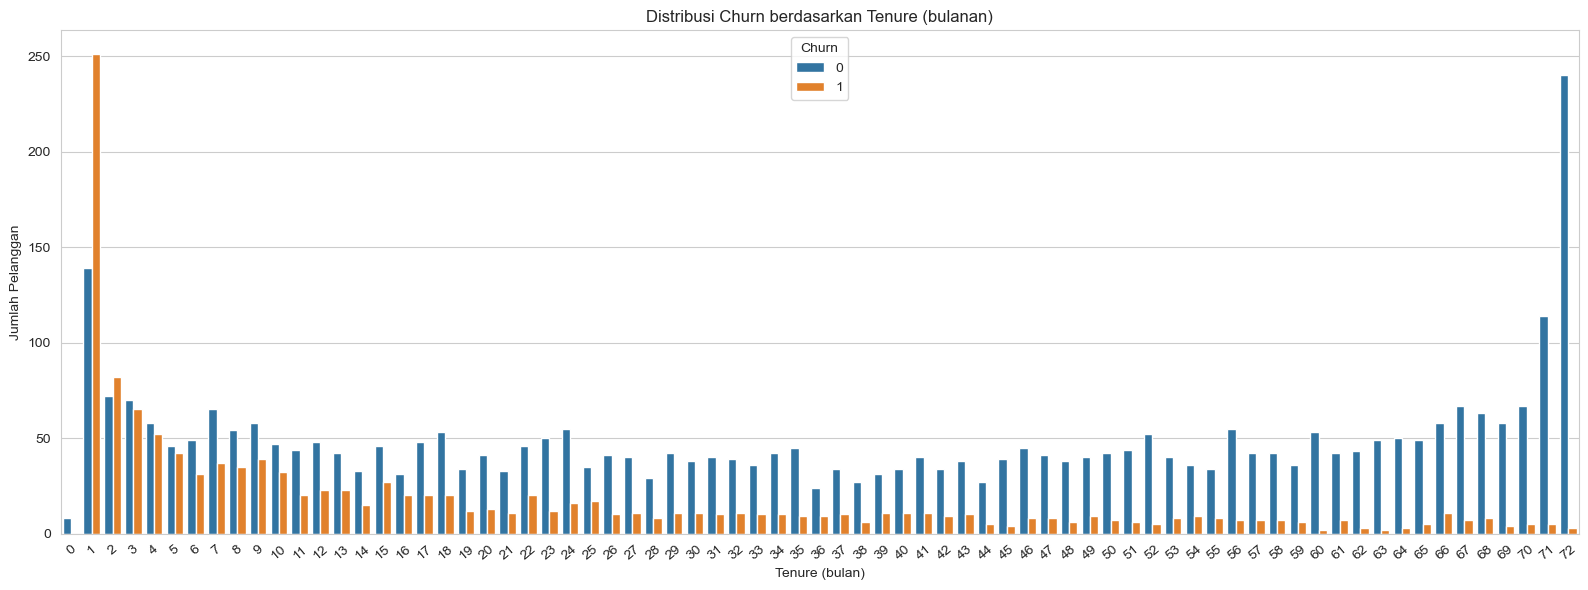

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x='tenure', hue='Churn')
plt.xticks(rotation=40)
plt.title('Distribusi Churn berdasarkan Tenure (bulanan)')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()


In [ ]:
# Pake Lime 
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
gbc_tuning.steps

[('transformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onehot',
                                   OneHotEncoder(drop='first',
                                                 handle_unknown='ignore',
                                                 sparse_output=False),
                                   Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
         'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
        dtype='object')),
                                  ('robust', RobustScaler(),
                                   Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
 ('resampler', RandomOverSampler(random_state=0)),
 ('model',
  GradientBoostingClassifier(learning_rate=np.float64(0.34),
                             max_depth=np.int64(1), max_features=np.int64(3),
                             n_estimators=np.int64(93), random_state=0,
                             subsample=np.float

In [ ]:
gbc_tuned_model = gbc_tuning["model"]
gbc_tuned_model 

GradientBoostingClassifier(learning_rate=np.float64(0.34),
                           max_depth=np.int64(1), max_features=np.int64(3),
                           n_estimators=np.int64(93), random_state=0,
                           subsample=np.float64(0.6))

In [ ]:
preprocess_tuned = gbc_tuning["transformer"]  # Ambil transformer dari gbc_tuning
preprocess_tuned 

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                ('robust', RobustScaler(),
                                 Index(['tenure', 'MonthlyCharges'], dtype='object'))])

In [226]:
sample_X_transform = X_transform[0, :]  # ambil baris ke-0 (semua kolom)
sample_X_transform


array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        , -0.42553191,
        0.046     ])

In [227]:
#Create LIME Explainer 
explainer_lime = LimeTabularExplainer(
    training_data = X_transform, # cuman bisa array 
    feature_names= feature_names, # karena array, perlu ini biar ada nama kolomnya
    mode = "classification", #Untuk model klasifikasi
    random_state=0, # biar gak keubah ubah pas di run ulang 
    class_names =["legitimate", "churn"] #optional
)

In [228]:
import dill

In [229]:
# Save Lime Explainer untuk di deployment 
with open ('lime_explainer.pkl', 'wb') as file :
    dill.dump(explainer_lime, file)

print("LIME EXPLAINER SAVED SUCCESFULLY")


LIME EXPLAINER SAVED SUCCESFULLY


<function matplotlib.pyplot.show(close=None, block=None)>

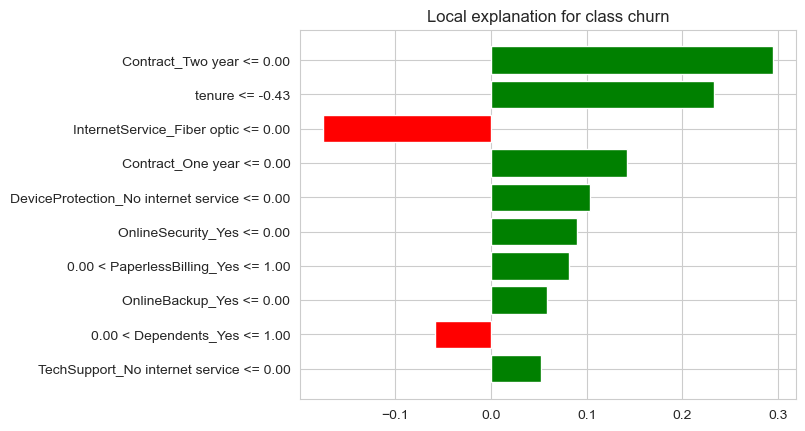

In [230]:
explanation = explainer_lime.explain_instance(
    data_row = sample_X_transform,           #Sample yang mau dijelaskan (harus array)
    predict_fn = gbc_tuned_model.predict_proba,
    num_features = 10
)

#Display explanation
fig = explanation.as_pyplot_figure()
plt.show

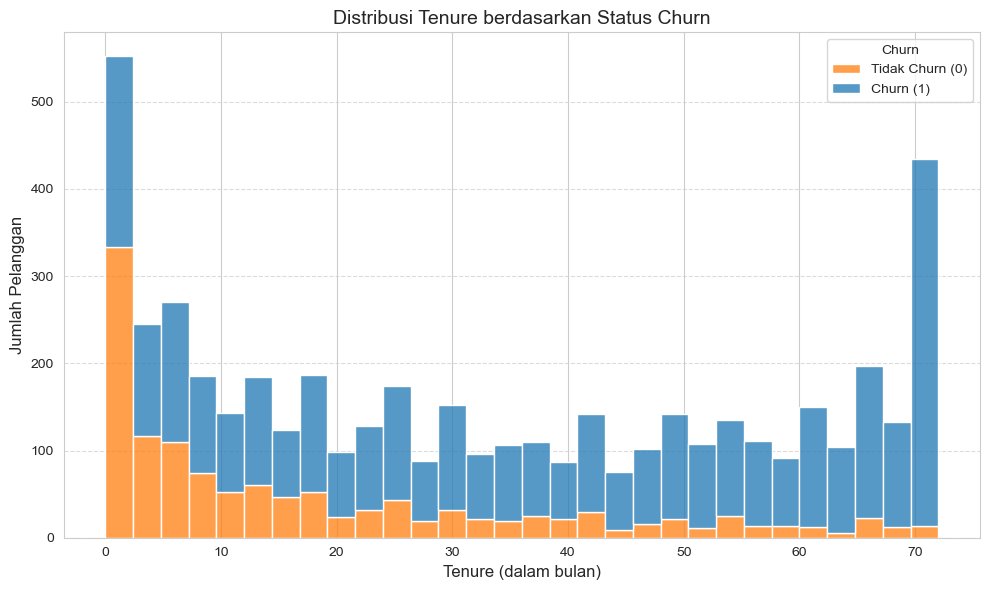

In [203]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)

plt.title('Distribusi Tenure berdasarkan Status Churn', fontsize=14)
plt.xlabel('Tenure (dalam bulan)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.legend(title='Churn', labels=['Tidak Churn (0)', 'Churn (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [232]:
import shap

In [233]:
explainer_shap = shap.TreeExplainer(
    model = gbc_tuned_model,
    data =X_transform
)

shap_value = explainer_shap.shap_values(X_transform)

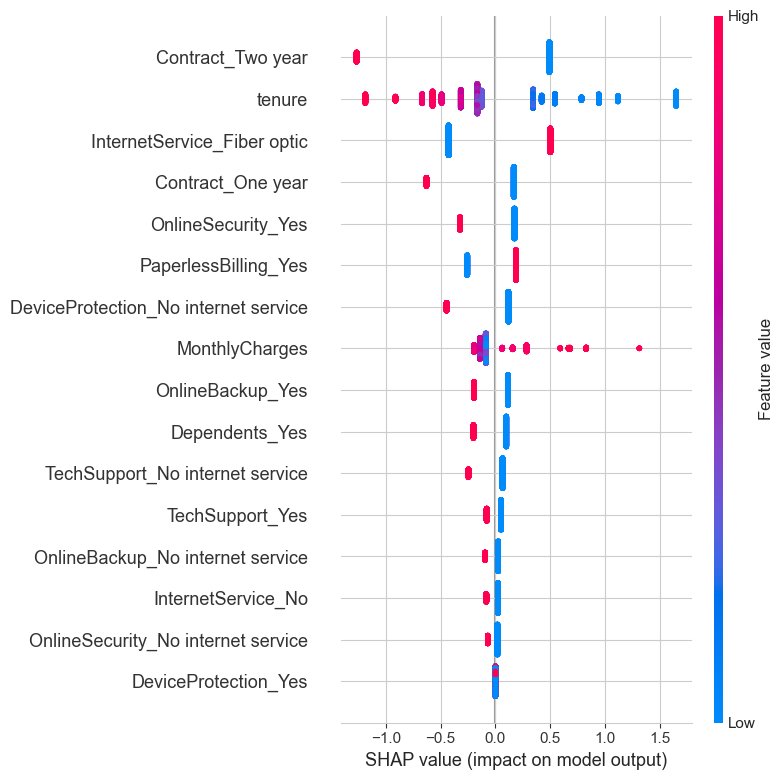

In [235]:
shap.summary_plot(shap_value,
                  X_transform,
                  feature_names=feature_names)

## **Summary untuk Analisis Data selanjutnya**

- Tenure (Lama Berlangganan) — Importance: 0.238
    - Pelanggan dengan masa langganan pendek (terutama <6 bulan) memiliki risiko churn yang tinggi.
    - Visualisasi menunjukkan lonjakan churn pada bulan ke-1.

- InternetService_Fiber optic — Importance: 0.189
    - Pelanggan dengan layanan fiber optic lebih cenderung churn dibanding DSL atau tidak ada layanan internet.

- Contract_Two year dan Contract_One year — Importance: 0.156 & 0.068
    - Pelanggan dengan kontrak jangka panjang cenderung lebih loyal.

- TechSupport_No internet service / Yes — Importance: 0.115 & 0.062
    - Tersedianya layanan dukungan teknis berkorelasi negatif dengan churn.
    
- Terlihat lonjakan churn di awal masa langganan (1-3 bulan), khususnya di bulan pertama.
- Churn hampir tidak terjadi setelah bulan ke-60.

- Pelanggan jangka pendek (< 20 bulan) mendominasi churn.
- Pelanggan jangka panjang (> 60 bulan) didominasi oleh yang tidak churn (loyal customer).


Feature yang bisa dihapus:
1. OnlineBackup
    - Berdasarkan feature importance sebelumnya, kontribusi OnlineBackup terhadap prediksi churn sangat rendah. Meskipun layanan ini bisa menjadi indikator churn, ternyata dalam data ini tidak terlalu informatif.

2. DeviceProtection
    - Sama seperti OnlineBackup, fitur ini juga memiliki importance sangat kecil dan tampaknya tidak memberikan diferensiasi signifikan antara churn dan non-churn.


## **Kesimpulan**

1. Tingkat Churn Pelanggan
   
    Dari total data, sekitar 26,6% pelanggan melakukan churn. Ini menunjukkan bahwa lebih dari seperempat pelanggan memilih berhenti menggunakan layanan, yang merupakan sinyal kuat bagi manajemen untuk meningkatkan retensi pelanggan.

2. Pengaruh Fitur terhadap Churn

    Berdasarkan feature importance dari model Gradient Boosting, fitur yang paling berpengaruh terhadap churn adalah:
    - tenure
    - MonthlyCharges
    - Contract
    - InternetService

3. Evaluasi Model Gradient Boosting
    - F2 Score (Test Set) sebelum tuning: 0.71
    - F2 Score (Test Set) sesudah tuning: 0.755

    Artinya, tuning hyperparameter berhasil meningkatkan performa model dalam mengenali pelanggan yang benar-benar akan churn. Metrik F2 Score dipilih karena False Negative (kehilangan pelanggan) memiliki dampak biaya ($500) yang jauh lebih besar dibanding False Positive ($100).

4. Efisiensi Biaya Promosi
    - Tanpa ML, promosi diberikan ke seluruh pelanggan, menyebabkan biaya sia-sia sebesar $71,300.
    - Dengan ML, promosi menjadi lebih tepat sasaran dan kerugian turun menjadi $39,300.
    - Machine Learning berhasil menurunkan kerugian sampai 45% dari total kerugian sebelumnya

## **Rekomendasi**

Rekomendasi

1. Implementasikan Model Gradient Boosting ke Proses Operasional
    
    Gunakan model ini dalam sistem pemasaran untuk memprioritaskan pelanggan berisiko tinggi churn agar mendapat perhatian khusus (diskon, insentif, komunikasi aktif).

2. Fokus pada Fitur Penting Pertimbangkan Penghapusan Fitur Kurang Relevan
    
    Perusahaan dapat memusatkan analisis dan strategi pada pelanggan dengan:
    - Kontrak bulanan
    - Tenure pendek
    - Biaya bulanan tinggi
    - Jenis layanan internet tertentu (misalnya DSL atau Fiber)

3. Kembangkan Strategi Customer Retention

    Berdasarkan hasil model, rancang strategi berbasis data untuk mengurangi churn, seperti:
    - Penawaran kontrak tahunan
    - Program loyalitas untuk pengguna baru
    - Paket bundling layanan internet dan telepon

4. Monitoring & Evaluasi Berkala

    Model perlu dipantau dan ditingkatkan secara berkala untuk menyesuaikan dengan tren dan perilaku pelanggan yang dinamis.

## **Save Model**

In [150]:
# best model
gbc_tuning = random_gbc.best_estimator_
gbc_tuning

# fitting
gbc_tuning.fit(X,y)

# save dengan pickle
pickle.dump(gbc_tuning, open('model_gbc.sav','wb'))

In [204]:
gbc_params = random_gbc.best_params_
gbc_params

{'resampler': RandomOverSampler(random_state=0),
 'model__subsample': np.float64(0.6),
 'model__n_estimators': np.int64(93),
 'model__max_features': np.int64(3),
 'model__max_depth': np.int64(1),
 'model__learning_rate': np.float64(0.34)}

In [205]:
pickle.dump(gbc_params, open('best_params.sav','wb'))

In [151]:
# load model

model_loaded = pickle.load(open('model_gbc.sav', 'rb'))
model_loaded 

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('robust', RobustScaler(),
                                                  Index(['tenure', 'MonthlyCharges'], dtype='object'))])),
                ('resampler', RandomOverSampler(random_state=0)),
                ('model',
                 GradientBoostingClassifier(learning_rate=np.float64(0.34),
                                            max_depth=np.int64(1),
                                            max_features=np.int64(3),
                                            n_estimators=np.int64(93),
                                            random_state=0,
                                            subsample=np.float64(0.6)))])

## **Preparation for Streamlit**

In [152]:
# y actual = 1 --> churn
y[0]

np.int64(1)

In [153]:
# customer index 0 akan diprediksi
df.iloc[[0], :]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.9,1


In [154]:
# customer index 4 akan diprediksi
df.iloc[[3], :]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0


In [158]:
X[numerical_cols]

,tenure,MonthlyCharges
0,9,72.90
1,14,82.65
2,64,47.85
3,72,69.65
4,3,23.60
...,...,...
4925,15,103.45
4926,10,91.10
4927,58,20.75
4928,1,69.75


In [159]:
df[category_cols]

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling
0,Yes,No,No,DSL,Yes,Yes,Month-to-month,Yes
1,No,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes
2,No,Yes,No,DSL,Yes,Yes,Two year,No
3,No,Yes,Yes,DSL,Yes,Yes,Two year,No
4,No,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes
...,...,...,...,...,...,...,...,...
4925,No,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes
4926,Yes,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes
4927,No,No internet service,No internet service,No,No internet service,No internet service,Two year,No
4928,No,No,No,Fiber optic,No,No,Month-to-month,Yes


In [160]:
pd.set_option('display.max_colwidth', None)


cat_cols = X.select_dtypes(exclude='number').columns

unique_values_df = pd.DataFrame({
    'column': cat_cols,
    'unique_values': [X[col].unique().tolist() for col in cat_cols]
})


unique_values_df.to_csv("kolom_kategori_unique_values.csv", index=False)
unique_values_df

,column,unique_values
0,Dependents,"[Yes, No]"
1,OnlineSecurity,"[No, Yes, No internet service]"
2,OnlineBackup,"[No, Yes, No internet service]"
3,InternetService,"[DSL, Fiber optic, No]"
4,DeviceProtection,"[Yes, No internet service, No]"
5,TechSupport,"[Yes, No, No internet service]"
6,Contract,"[Month-to-month, Two year, One year]"
7,PaperlessBilling,"[Yes, No]"


In [161]:
X.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


In [167]:
X_transform = preprocess_tuned. transform(X)
X_transform

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.42553191,  0.046     ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.31914894,  0.241     ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.74468085, -0.455     ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.61702128, -0.997     ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.59574468, -0.017     ],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
        -0.53191489, -1.004     ]])

In [213]:
feature_names = preprocess_tuned.get_feature_names_out()
feature_names

array(['Dependents_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'tenure', 'MonthlyCharges'], dtype=object)